# Line graph

In [1]:
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어옵니다.
marathon_2015_2017 = pd.read_csv("../marathon_data/marathon_2015_2017.csv")

# matplotlib 를 불러옵니다.
import matplotlib.pyplot as plt

# 'Official Time' column 을 기준으로 오름차순 정렬하여 '5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time' column 만 가져옵니다.
record = pd.DataFrame(marathon_2015_2017,columns=['5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time']).sort_values(by=['Official Time'])

In [2]:
record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79638 entries, 0 to 53227
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   5K             79638 non-null  int64
 1   10K            79638 non-null  int64
 2   15K            79638 non-null  int64
 3   20K            79638 non-null  int64
 4   Half           79638 non-null  int64
 5   25K            79638 non-null  int64
 6   30K            79638 non-null  int64
 7   35K            79638 non-null  int64
 8   40K            79638 non-null  int64
 9   Official Time  79638 non-null  int64
dtypes: int64(10)
memory usage: 6.7 MB


In [3]:
record.head()

,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,883,1783,2697,3629,3842,4567,5520,6479,7381,7822


In [4]:
# 0번째 위치에 'Rank' 라는 이름의 column을 추가합니다.
record.insert(0, 'Rank', range(1, 1 + len(record)))

In [5]:
record.head()

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,1,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,2,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,3,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,4,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,5,883,1783,2697,3629,3842,4567,5520,6479,7381,7822


In [6]:
# record DataFrame에서 index 0 ~ 99까지의 row를 슬라이싱으로 가져옵니다.(Top 100)
top100 = record[0: 100]

In [7]:
top100

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,1,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,2,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,3,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,4,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,5,883,1783,2697,3629,3842,4567,5520,6479,7381,7822
...,...,...,...,...,...,...,...,...,...,...,...
41,96,1006,2023,3046,4063,4286,5092,6133,7181,8216,8747
40,97,890,1824,2821,3828,4043,4822,5864,6967,8155,8747
42,98,959,1952,2985,4015,4246,5061,6120,7197,8273,8758
53265,99,998,2007,3015,4044,4269,5075,6134,7219,8286,8760


In [8]:
# top100 DataFrame에서 'Rank' column 만 가져와 xData Series 를 생성합니다.(x값 생성)
xData = top100.Rank

In [9]:
xData

0          1
53228      2
1          3
53229      4
2          5
        ... 
41        96
40        97
42        98
53265     99
43       100
Name: Rank, Length: 100, dtype: int32

In [10]:
# y값 생성
yData_final = top100['Official Time']  # top100 DataFrame에서 'Official Time' column 만 가져와 yData_final Series 를 생성합니다.
yData_10K = top100['10K']    # top100 DataFrame에서 '10K' column 만 가져와 yData_10K Series 를 생성합니다.
yData_20K = top100['20K']    # top100 DataFrame에서 '20K' column 만 가져와 yData_20K Series 를 생성합니다.
yData_30K = top100['30K']    # top100 DataFrame에서 '30K' column 만 가져와 yData_30K Series 를 생성합니다.

In [11]:
yData_final

0        7757
53228    7777
1        7788
53229    7798
2        7822
         ... 
41       8747
40       8747
42       8758
53265    8760
43       8765
Name: Official Time, Length: 100, dtype: int64

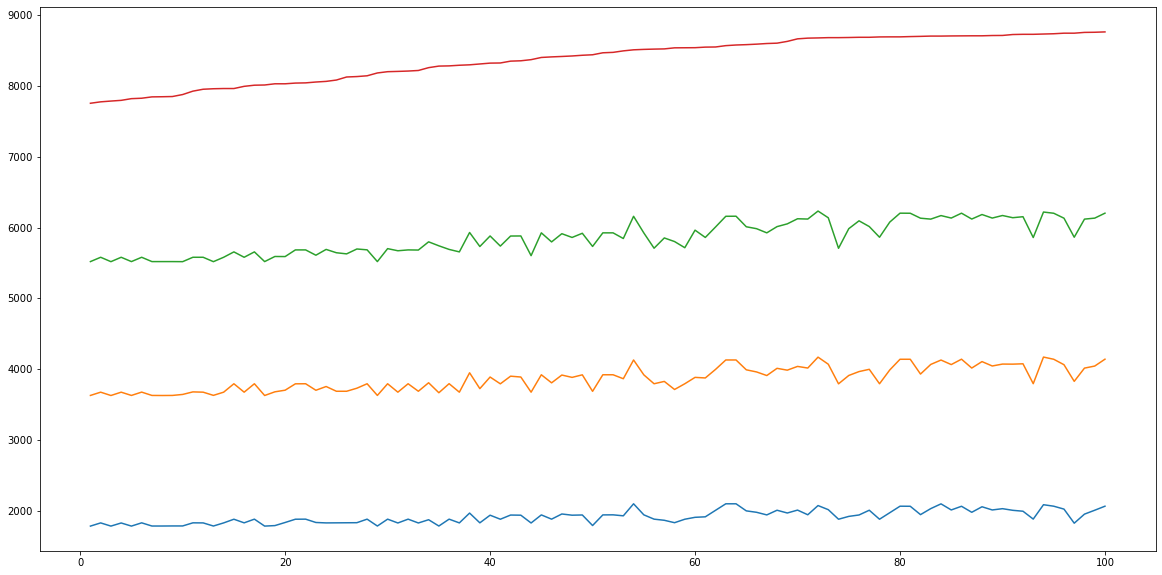

In [12]:
# 그림틀의 크기를 지정한다. 
plt.figure(figsize=(20,10))

# x축, y축 데이터를 지정하여 line graph를 그립니다.
plt.plot(xData, yData_10K)
plt.plot(xData, yData_20K)
plt.plot(xData, yData_30K)
plt.plot(xData, yData_final)

# 그래프를 출력
plt.show()

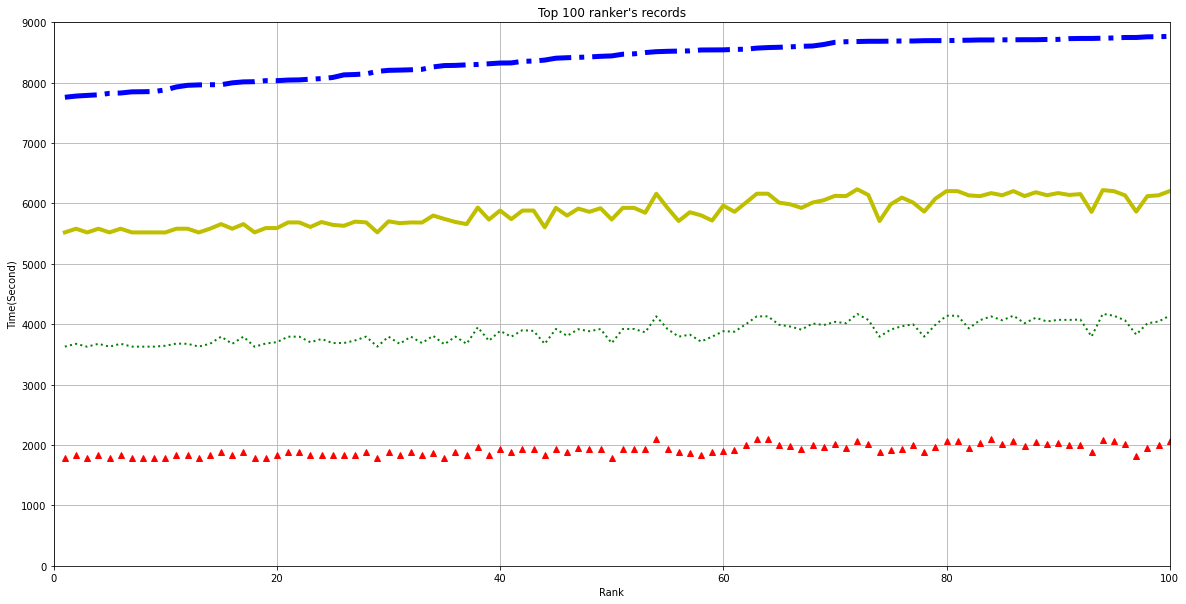

In [13]:
# 그림틀의 크기를 지정한다. 
plt.figure(figsize=(20,10))

# x축, y축 데이터를 지정하여 line graph를 그립니다.
# r은 빨강, b은 파랑, y은 노랑, k은 검정, g은 녹색, m은 보라
# linewidth 는 선의 두께
plt.plot(xData, yData_10K, 'r^')                   # '^' 은 삼각형
plt.plot(xData, yData_20K, 'g:', linewidth=2)      # ':' 은 점선
plt.plot(xData, yData_30K, 'y-', linewidth=4)      # '-' 은 실선
plt.plot(xData, yData_final, 'b-.', linewidth=5)   # '-.' 은 실선과 점

# title 추가
plt.title("Top 100 ranker's records")
# x축 label 추가
plt.xlabel("Rank")
# y축 label 추가
plt.ylabel("Time(Second)")

# grid 추가
plt.grid()

# X축 범위 지정
plt.xlim(0, 100)
# Y축 범위 지정
plt.ylim(0, 9000)

# 그래프를 출력
plt.show()

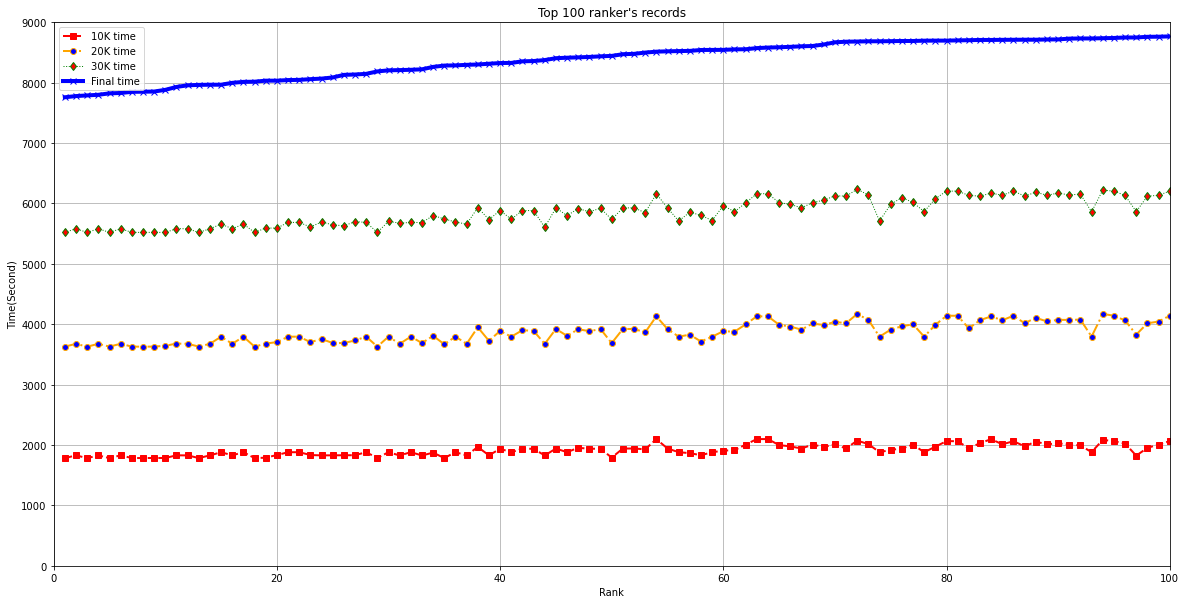

In [14]:
# 그림틀의 크기를 지정한다. 
plt.figure(figsize=(20,10))

# x축, y축 데이터를 지정하여 line graph를 그립니다.
# keyword 파라미터를 사용하여 속성을 설정할 수 있습니다.
plt.plot(xData, yData_10K, color='red', linewidth=2, linestyle='--', marker='s', label='10K time')
plt.plot(xData, yData_20K, color='orange', linewidth=2, linestyle='-.', marker='o', markerfacecolor='blue', markersize=6, label='20K time')
plt.plot(xData, yData_30K, color='green', linewidth=1, linestyle=':', marker='d', markerfacecolor='red', markersize=6, label='30K time')
plt.plot(xData, yData_final, color='blue', linewidth=4, linestyle='-', marker='x', label='Final time')

# title 추가
plt.title("Top 100 ranker's records")
# x축 label 추가
plt.xlabel("Rank")
# y축 label 추가
plt.ylabel("Time(Second)")

# grid 추가
plt.grid()

# X축 범위 지정
plt.xlim(0, 100)
# Y축 범위 지정
plt.ylim(0, 9000)

# 범주를 표시
plt.legend()

# 그래프를 출력
plt.show()

### subplot 함수로 여러 그래프를 한 번에 출력하기
  - subplot 함수로 구획을 구별하여 각각의 subplot에 그래프를 출력
  - subplot(행, 열, index)

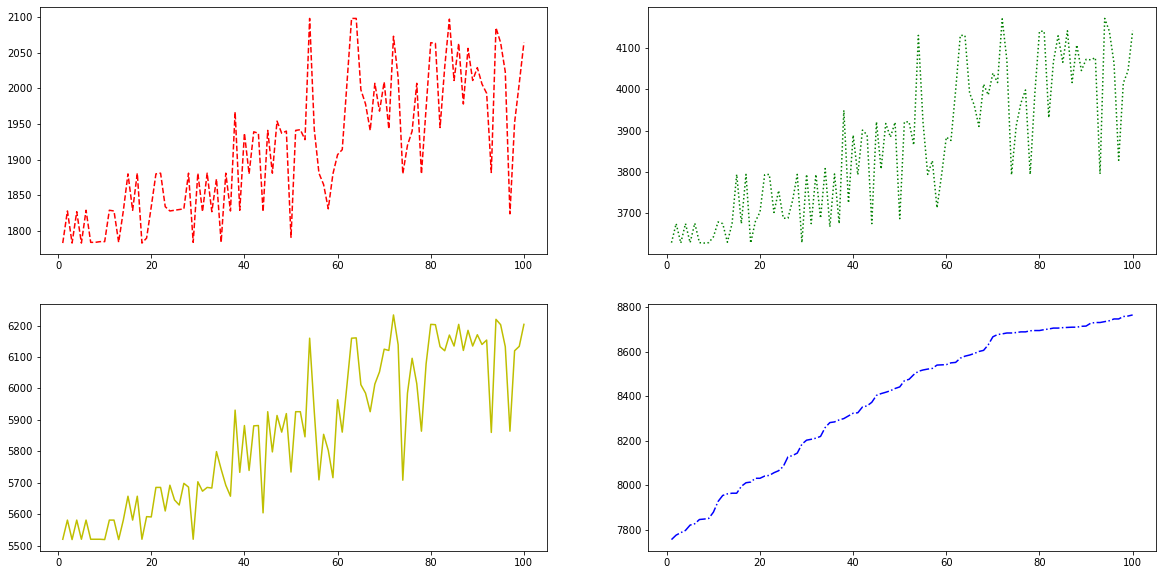

In [15]:
# 그림틀의 크기를 지정한다. 
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(xData, yData_10K, 'r--')

plt.subplot(2,2,2)
plt.plot(xData, yData_20K, 'g:')

plt.subplot(2,2,3)
plt.plot(xData, yData_30K, 'y-')

plt.subplot(2,2,4)
plt.plot(xData, yData_final, 'b-.')

# 그래프를 출력
plt.show()

### subplots 함수로 여러 그래프를 한 번에 출력하기
  - subplot 함수는 일일이 그래프 출력 영역을 설정해 줘야 하지만 subplots 함수는 한 번에 설정해 줄 수 있다
  - fig, ax = plt.subplots() 형태로 주로 사용됨
    + fig 란 figure 로서 전체 subplot을 말한다.(subplot 이 몇 개가 있던지 상관없이 전체를 담는 하나)
    + ax 란 axe 로서 각각의 subplot을 말한다.(subplot 안에 2개의 그래프가 있다면 각각의 그래프를 말함)
    + subplots 함수 파라미터
      + nrows : 몇 행을 만들 것인지
      + ncols : 몇 열을 만들 것인지
      + sharex : Xtick의 값(x축)을 공유할 것인지
      + sharey : Ytick의 값(y축)을 공유할 것인지
      + figsize : figure(그림틀)의 크기 지정

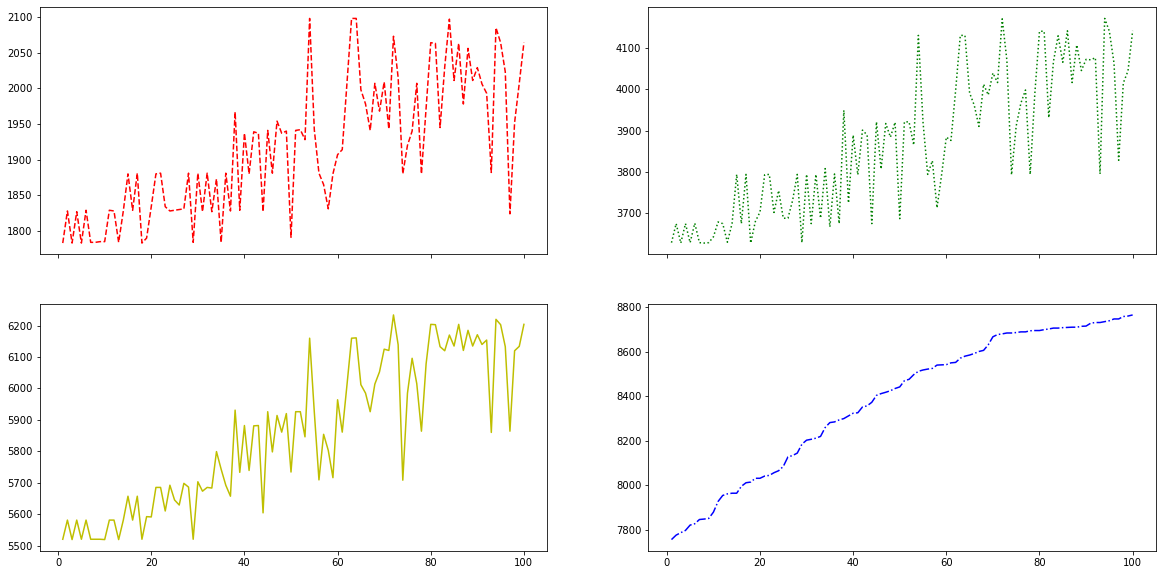

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,10))
axs[0,0].plot(xData, yData_10K, 'r--')
axs[0,1].plot(xData, yData_20K, 'g:')
axs[1,0].plot(xData, yData_30K, 'y-')
axs[1,1].plot(xData, yData_final, 'b-.')

# 그래프를 출력
plt.show()